In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# import MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


def generate_random_number(x_data,y_data):
    num_samples = len(x_data)
    data_numb=np.zeros((num_samples, 28, 140, 1), dtype=np.float32)
    data_labe=np.zeros((num_samples, 5), dtype=np.int_)
    for i in range(num_samples):
        digit1 = np.random.randint(0, 10)
        digit2 = np.random.randint(0, 10)
        digit3 = np.random.randint(0, 10)
        digit4 = np.random.randint(0, 10)
        digit5 = np.random.randint(0, 10)

        
        positions = np.random.choice([0, 1, 2], size=5)  
        canvas = np.zeros((28, 140, 1), dtype=np.float32)
        lent_front = 0
        for n, position in enumerate(positions):
            digit = [digit1, digit2, digit3, digit4, digit5][n]
            id=np.random.choice(y_data[y_data == digit])
            if n==0:
                lent_front = 28*n
                x_data_front = np.zeros((28, lent_front, 1), dtype=np.float32)
                x_data_after = np.zeros((28, 112-lent_front, 1), dtype=np.float32)
            else:
                numb=np.random.randint(8,20)
                lent_front = lent_front+numb
                x_data_front = np.zeros((28, lent_front, 1), dtype=np.float32)
                x_data_after = np.zeros((28, 112-lent_front, 1), dtype=np.float32)
            canvas_add = np.concatenate([x_data_front, x_data[id]], 1)
            canvas_add = np.concatenate([canvas_add, x_data_after],  1)
            canvas += canvas_add 
            data_labe[i][n]=y_data[id]
        data_numb[i]=canvas 
    print('end')
    return data_numb, data_labe


x_train_random , y_train_random = generate_random_number(x_train, y_train)
x_test_random , y_test_random = generate_random_number(x_test, y_test)
x_verify_random , y_verify_random = generate_random_number(x_test, y_test)

2023-10-03 06:23:21.273825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 06:23:22.142146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


end
end
end


In [2]:
def trans (dat):
    y_labe=np.zeros((len(dat), 1), dtype=np.int_)
    for i in range(len(dat)):
        y_labe[i]=''.join(str(j) for j in dat[i])
   
    return y_labe

y_train_rand = trans(y_train_random)
y_test_rand = trans(y_test_random)
y_verify_rand = trans(y_verify_random)

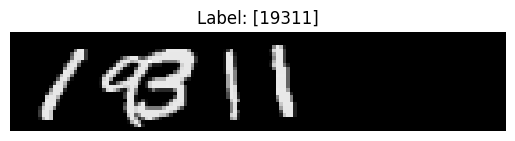

In [3]:

import matplotlib.pyplot as plt
plt.imshow(x_train_random[101], cmap='gray')
plt.title(f"Label: {y_train_rand[101]}")
plt.axis('off')

plt.show()

In [4]:
# -hot
y_train_onehot = to_categorical(y_train_rand)
y_test_onehot = to_categorical(y_test_rand)
y_verify_onehot = to_categorical(y_verify_rand)
print(y_train_onehot.shape)

(60000, 100000)


In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
# Conv2D MaxPooling2D Dropout Flatten Dense BN  GAP 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Layer, BatchNormalization, GlobalAveragePooling2D  
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import Model, Input  
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau 

#modle 
captcha = Input(shape=(28,140,1)) 
x = Conv2D(32, (5,5),padding='valid',activation='relu')(captcha) 
x = MaxPooling2D((2,2),padding='same')(x) 
x = Conv2D(64, (3,3),padding='same',activation='relu')(x) 
x = MaxPooling2D((2,2),padding='same')(x) 
x = Conv2D(128, (3,3),padding='same',activation='relu')(x) 
maxpool = MaxPooling2D((2,2),padding='same')(x) 
outputs = [] 
for i in range(5): 
    x = Conv2D(256, (3,3),padding='same',activation='relu')(maxpool) 
    x = MaxPooling2D((2,2),padding='same')(x) 
    x = Flatten()(x) 
    x = Dropout(0.5)(x) 
    x = BatchNormalization()(x) 
    x = Dense(64, activation='relu')(x) 
    x = Dropout(0.5)(x) 
    x = BatchNormalization()(x) 
    x = Dense(1, activation='softmax' , name=f'char_{i+1}')(x) 
    outputs.append(x) 
     
model = Model(inputs = captcha , outputs=outputs) 
# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(patience =3, factor = 0.5,verbose = 1) 
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=["accuracy"]) 

In [18]:
history = model.fit(x_train_random, [y_train_random[:,i] for i in range(5)], 
                    batch_size=64, epochs=20, verbose=1, 
                    validation_data = (x_test_random, [y_test_random[:,i] for i in range(5)])
                     #callbacks =[earlystopping,reduce_lr]
                     )

Epoch 1/20
938/938 [==============================] - 31s 25ms/step - loss: 0.0000e+00 - char_1_loss: 0.0000e+00 - char_2_loss: 0.0000e+00 - char_3_loss: 0.0000e+00 - char_4_loss: 0.0000e+00 - char_5_loss: 0.0000e+00 - char_1_accuracy: 0.3000 - char_2_accuracy: 0.3006 - char_3_accuracy: 0.2976 - char_4_accuracy: 0.2999 - char_5_accuracy: 0.2977 - val_loss: 0.0000e+00 - val_char_1_loss: 0.0000e+00 - val_char_2_loss: 0.0000e+00 - val_char_3_loss: 0.0000e+00 - val_char_4_loss: 0.0000e+00 - val_char_5_loss: 0.0000e+00 - val_char_1_accuracy: 0.1985 - val_char_2_accuracy: 0.2061 - val_char_3_accuracy: 0.2022 - val_char_4_accuracy: 0.2009 - val_char_5_accuracy: 0.1931
Epoch 2/20
938/938 [==============================] - 23s 24ms/step - loss: 0.0000e+00 - char_1_loss: 0.0000e+00 - char_2_loss: 0.0000e+00 - char_3_loss: 0.0000e+00 - char_4_loss: 0.0000e+00 - char_5_loss: 0.0000e+00 - char_1_accuracy: 0.3000 - char_2_accuracy: 0.3006 - char_3_accuracy: 0.2976 - char_4_accuracy: 0.2999 - char_5_